In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_data = pd.read_csv('../data/customer_data.csv')
customer_data.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,Retail,Camp-Outdoor,Unknown,Unknown,Unknown,NaN,NaN
1,32,2,Retail,Reference-Customer,Unknown,Unknown,Unknown,NaN,NaN
2,34,4,Retail,Reference-Customer,Unknown,Married,Unknown,NaN,NaN
3,35,5,Retail,Reference-Customer,Unknown,Unknown,Unknown,NaN,NaN
4,42,7,Retail,Just Dial/Other helpline,Unknown,Unknown,Unknown,NaN,NaN


In [3]:
invoice_data = pd.read_csv('../data/invoice_data.csv')
invoice_data.head()

,Area / Locality,CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,...,Regn No,Service Advisor Name,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Invoice Day,Invoice Month,Invoice Year,Day of the week
0,MAJIWADA,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,...,KA19MA1291,NaN,RUPESH,4051.95,4051.95,BC01FS1,2,1,2015,Friday
1,THNAE,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,...,MH43R3046,NaN,PRASHANT,1001.29,1001.29,BC01SA2,3,1,2015,Saturday
2,THANE,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,...,AP09AX0582,NaN,IMRAN,233.14,233.14,BC01SA2,3,1,2015,Saturday
3,THNAE,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,...,MH43R3046,NaN,PRASHANT,0.00,0.00,BC01SA2,3,1,2015,Saturday
4,THANE,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,...,MH04CD9768,NaN,DAYANAND,2747.12,2747.12,BC01SA2,3,1,2015,Saturday


In [4]:
jtd = pd.read_csv('../data/JTD.csv')
jtd.head()

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


In [5]:
jtd['Item Category'].value_counts()

P002    3250293
P001    1845451
P011     343288
P010     128823
G2TX      51629
Name: Item Category, dtype: int64

In [6]:
#total revenue
invoice_data['Total Value'].sum()

1303469601.4299998

In [7]:
total_revenue_by_brand = invoice_data[['Total Value','Make']].groupby('Make').sum().reset_index().sort_values(by='Total Value', ascending=False)

In [8]:
plt.rcParams.update({'font.size': 15})

Text(0.5, 0, 'Total Value')

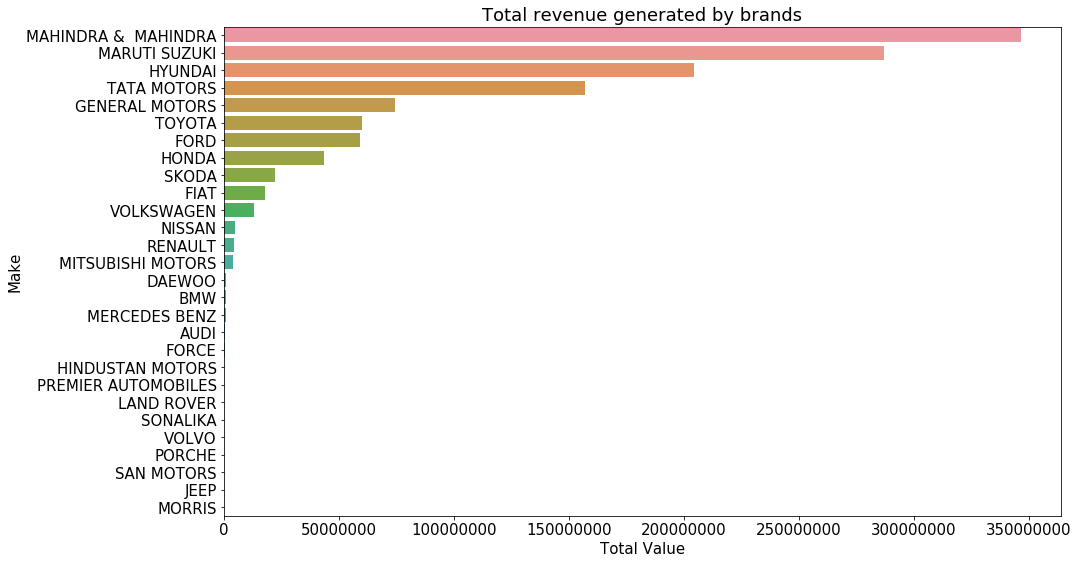

In [9]:
plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Total revenue generated by brands')
ax = sns.barplot(x='Total Value', y='Make', data=total_revenue_by_brand)
ax.set_xlabel('Total Value')

### Local brands which are accessible to more people are generating more revenue. Luxurios brands are not contributing much to the revenue.

Text(0.5, 0, 'Labour Total')

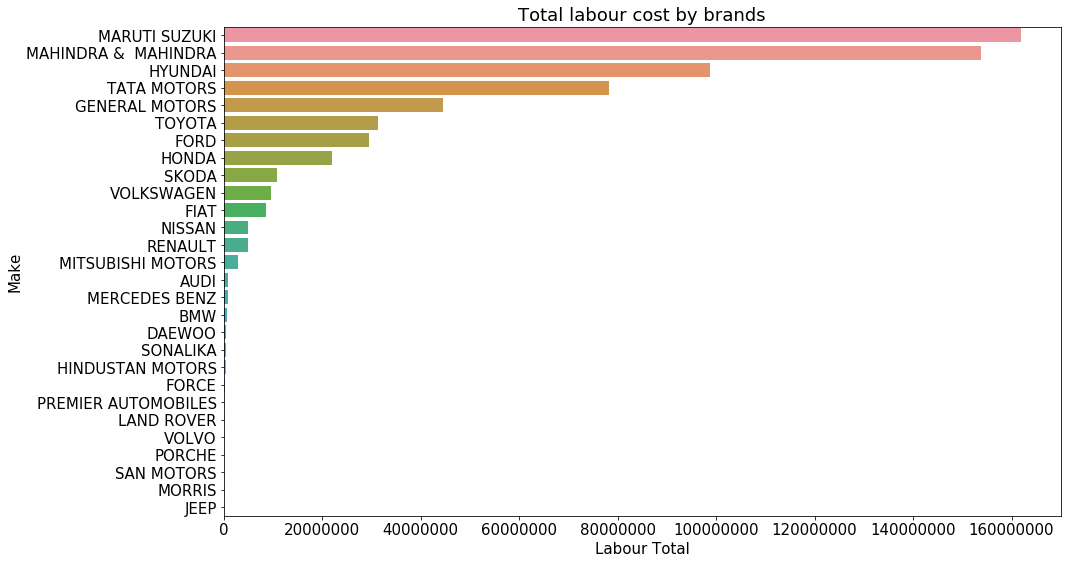

In [10]:
#for finding profits by brand, adding only labour cost and misc total to get a new feature

labour_by_brand = invoice_data[['Labour Total','Make']].groupby('Make').sum().reset_index().sort_values(by='Labour Total', ascending=False)

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Total labour cost by brands')
ax = sns.barplot(x='Labour Total', y='Make', data=labour_by_brand)
ax.set_xlabel('Labour Total')

Text(0.5, 0, 'OSL Total')

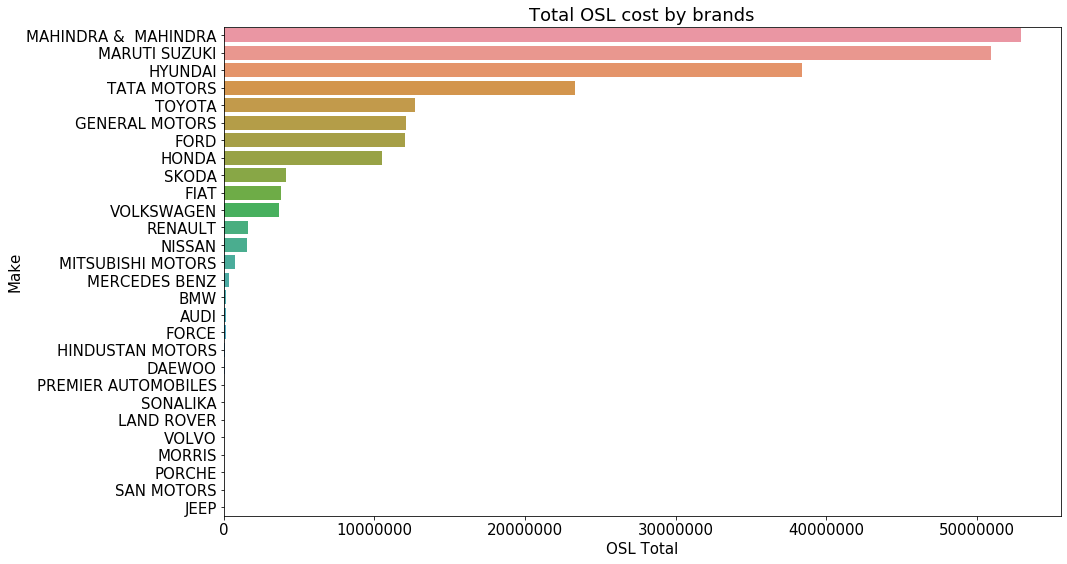

In [11]:
osl_by_brand = invoice_data[['OSL Total','Make']].groupby('Make').sum().reset_index().sort_values(by='OSL Total', ascending=False)

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Total OSL cost by brands')
ax = sns.barplot(x='OSL Total', y='Make', data=osl_by_brand)
ax.set_xlabel('OSL Total')

Text(0.5, 0, 'percent')

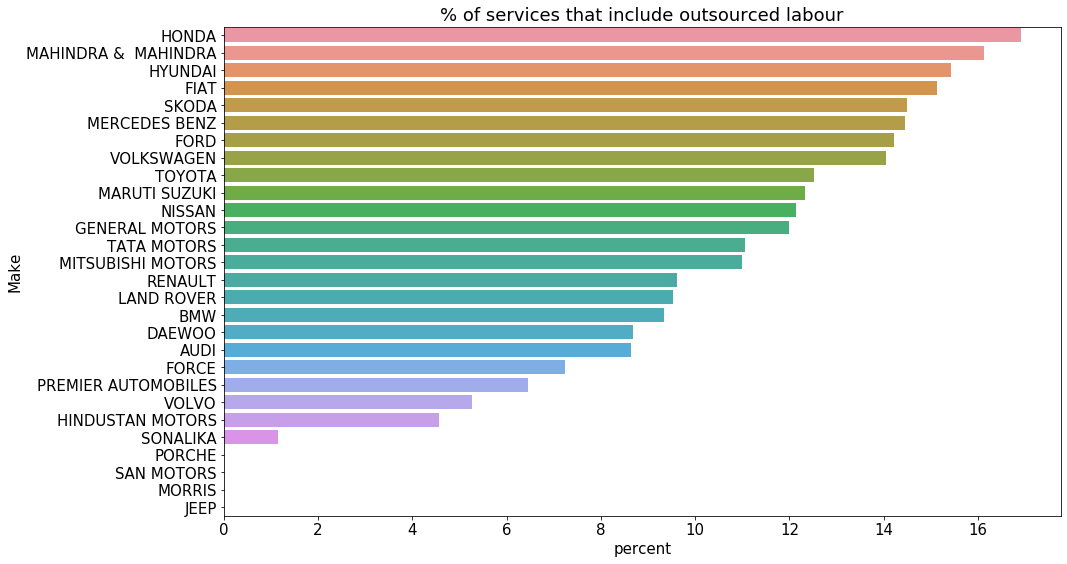

In [12]:
osl_by_brand = invoice_data[['OSL Total','Make']]
osl_by_brand_nonzero_count = osl_by_brand.groupby('Make').agg(lambda x: x.ne(0.0).sum()).reset_index()

osl_count = osl_by_brand.groupby('Make').agg(['mean', 'count'])
osl_by_brand_nonzero_count['count'] = osl_count['OSL Total']['count'].reset_index()['count']
osl_by_brand_nonzero_count['percent'] = (osl_by_brand_nonzero_count['OSL Total']/osl_by_brand_nonzero_count['count'])*100

osl_by_brand_nonzero_count.sort_values(by='percent', ascending=False, inplace=True)

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('% of services that include outsourced labour')
ax = sns.barplot(x='percent', y='Make', data=osl_by_brand_nonzero_count)
ax.set_xlabel('percent')

[Text(0, 0.5, 'Number of customers'), Text(0.5, 0, 'Number of services')]

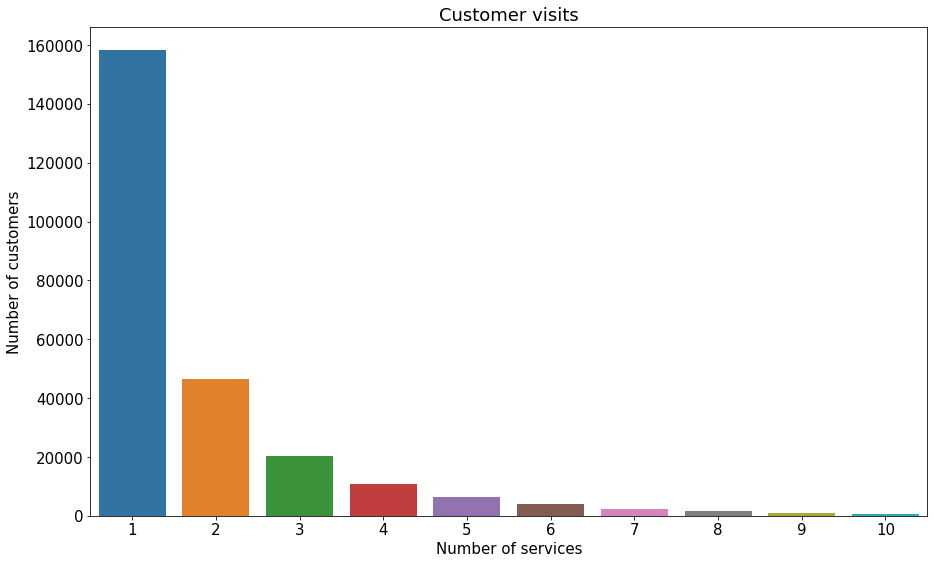

In [13]:
visit_df = invoice_data['Customer No.'].value_counts().rename_axis('unique_values').reset_index(name='counts')['counts'].value_counts().rename_axis('unique_values').reset_index(name='counts')

visit_df.sort_values(by='unique_values', inplace=True)
visit_df = visit_df[visit_df['unique_values']<=10]

plt.figure(figsize=(15,9))
plt.title('Customer visits')
ax = sns.barplot(x='unique_values', y='counts', data=visit_df)
ax.set(xlabel='Number of services', ylabel='Number of customers')

### Most of the customers have serviced their cars only once. There is a huge gap between the number of customers who came again.

In [14]:
invoice_data.columns

Index(['Area / Locality', 'CITY', 'Cash /Cashless Type', 'Claim No.',
       'Cust Type', 'Customer No.', 'District', 'Expiry Date',
       'Gate Pass Date', 'Gate Pass Time', 'Insurance Company', 'Invoice Date',
       'Invoice No', 'Invoice Time', 'Job Card No', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'ODN No.', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Policy no.', 'Print Status',
       'Recovrbl Exp', 'Regn No', 'Service Advisor Name', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total Value', 'User ID', 'Invoice Day',
       'Invoice Month', 'Invoice Year', 'Day of the week'],
      dtype='object')

In [15]:
invoice_data['Invoice Date'] = pd.to_datetime(invoice_data['Invoice Date'])

invoice_data['Invoice Day'] = invoice_data['Invoice Date'].apply(lambda x: x.day)
invoice_data['Invoice Month'] = invoice_data['Invoice Date'].apply(lambda x: x.month)
invoice_data['Invoice Year'] = invoice_data['Invoice Date'].apply(lambda x: x.year)
invoice_data['Day of the week'] = invoice_data['Invoice Date'].apply(lambda x: x.weekday_name)

In [16]:
invoice_data.to_csv('../data/invoice_data.csv', index=False)

Text(0.5, 0, 'Day of the week')

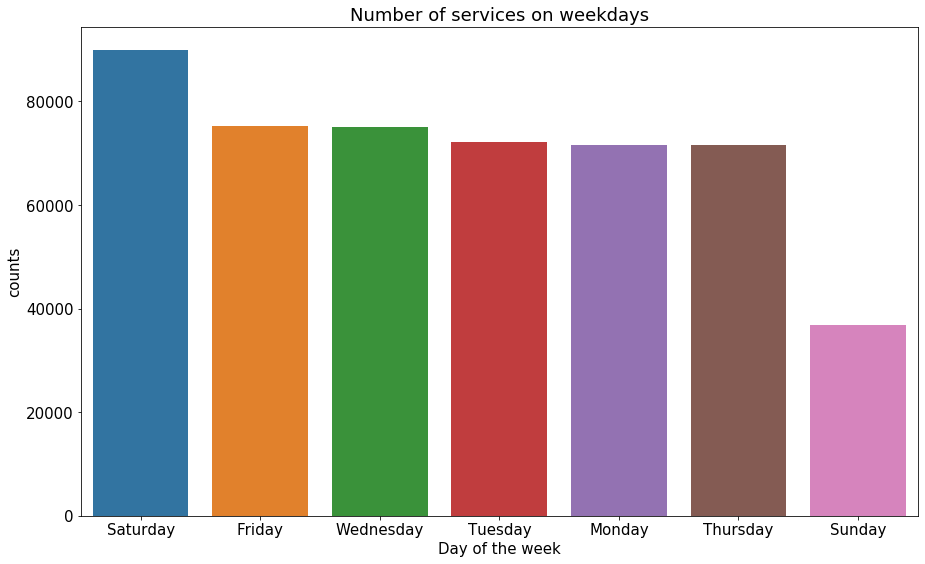

In [17]:
services_by_day = invoice_data['Day of the week'].value_counts().rename_axis('unique_values').reset_index(name='counts')

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Number of services on weekdays')
ax = sns.barplot(x='unique_values', y='counts', data=services_by_day)
ax.set_xlabel('Day of the week')

([<matplotlib.axis.XTick at 0x689c831550>,
 <a list of 4 Text xticklabel objects>)

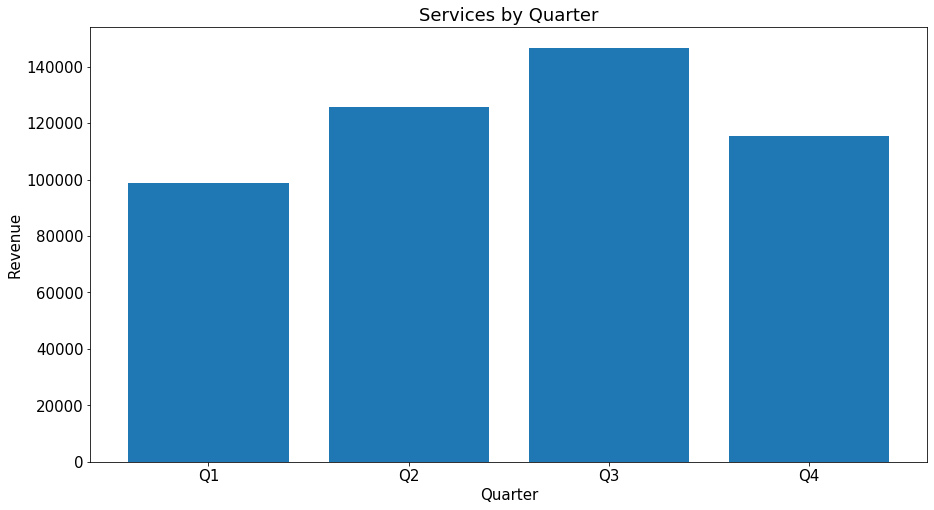

In [18]:
quarter_dict = {'Q1': 98615, 'Q2': 125597,'Q3': 146734,'Q4': 115368}

plt.figure(figsize=(15,8))
plt.title('Services by Quarter')
plt.bar(range(len(quarter_dict)), list(quarter_dict.values()), align='center')
plt.xlabel ('Quarter')
plt.ylabel ('Revenue')
plt.xticks(range(len(quarter_dict)), list(quarter_dict.keys()))

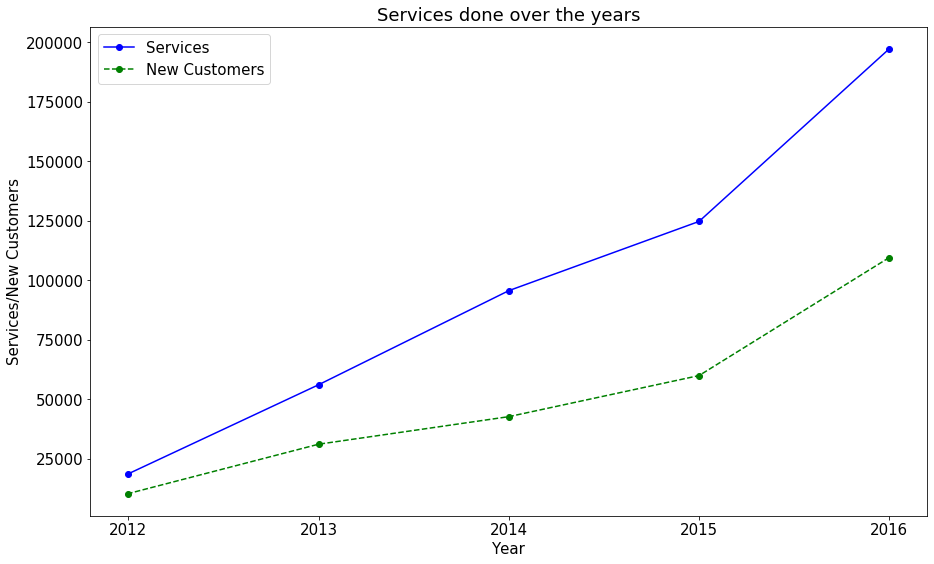

In [19]:
sorted_bydate = invoice_data.sort_values(by='Invoice Date')

sorted_bydate=sorted_bydate.drop_duplicates('Customer No.', keep='first')

new_customers_by_year = sorted_bydate['Invoice Year'].value_counts().rename_axis('unique_values').reset_index(name='new_count')

services_by_year = invoice_data['Invoice Year'].value_counts().rename_axis('unique_values').reset_index(name='counts')

services_by_year['new_count'] = new_customers_by_year['new_count']

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
line1 = plt.plot(services_by_year['unique_values'], services_by_year['counts'], marker='o', color='b', label='Services')
line2 = plt.plot(services_by_year['unique_values'], services_by_year['new_count'], marker='o',linestyle='--', color='g', label='New Customers')
plt.title('Services done over the years')
plt.xlabel("Year")
plt.ylabel("Services/New Customers")
plt.legend()
labels = ['2016', '2015', '2014', '2013', '2012']
plt.xticks(services_by_year['unique_values'], labels)
plt.show()

In [20]:
invoice_data.columns

Index(['Area / Locality', 'CITY', 'Cash /Cashless Type', 'Claim No.',
       'Cust Type', 'Customer No.', 'District', 'Expiry Date',
       'Gate Pass Date', 'Gate Pass Time', 'Insurance Company', 'Invoice Date',
       'Invoice No', 'Invoice Time', 'Job Card No', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'ODN No.', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Policy no.', 'Print Status',
       'Recovrbl Exp', 'Regn No', 'Service Advisor Name', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total Value', 'User ID', 'Invoice Day',
       'Invoice Month', 'Invoice Year', 'Day of the week'],
      dtype='object')

In [21]:
plant_file = pd.ExcelFile('../data/Plant Master.xlsx')
plant_data = plant_file.parse('Sheet1')
plant_data.to_csv('../data/plant_master.csv', index=False)

In [22]:
plant_data = pd.read_csv('../data/plant_master.csv')
plant_data.head()

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


In [23]:
plant_data.dtypes

Plant                       object
Name 1                      object
Valuation Area              object
Customer no. - plant        object
Vendor number plant         object
Factory calendar            object
Name 2                      object
House number and street     object
PO Box                     float64
Postal Code                  int64
City                        object
Sales organization          object
State                       object
dtype: object

In [24]:
invoice_tojoin.dtypes

NameError: name 'invoice_tojoin' is not defined

In [ ]:
invoice_tojoin = invoice_data[['Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Customer No.', 'Job Card No',
                              'JobCard Date', 'JobCard Time', 'Make', 'Model', 'Order Type', 'Plant','Total Amt Wtd Tax.']]

In [26]:
invoice_plant = invoice_data.merge(plant_data, on='Plant', how='left', sort=False)

In [60]:
invoice_plant = pd.read_csv('../data/invoice_plant_joined.csv')
invoice_plant.head()

,Unnamed: 0,Area / Locality,CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,...,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,0,MAJIWADA,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,THNAE,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,THANE,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,THNAE,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,THANE,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
invoice_plant.columns

Index(['Unnamed: 0', 'Area / Locality', 'CITY', 'Cash /Cashless Type',
       'Claim No.', 'Cust Type', 'Customer No.', 'District', 'Expiry Date',
       'Gate Pass Date', 'Gate Pass Time', 'Insurance Company', 'Invoice Date',
       'Invoice No', 'Invoice Time', 'Job Card No', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'ODN No.', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Policy no.', 'Print Status',
       'Recovrbl Exp', 'Regn No', 'Service Advisor Name', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total Value', 'User ID', 'Invoice Day',
       'Invoice Month', 'Invoice Year', 'Day of the week', 'Name 1',
       'Valuation Area', 'Customer no. - plant', 'Vendor number plant',
       'Factory calendar', 'Name 2', 'House number and street', 'PO Box',
       'Postal Code', 'City', 'Sales organization', 'State'],
      dtype='object')

In [61]:
invoice_plant['Invoice DateTime'] = invoice_plant['Invoice Date']+' '+invoice_plant['Invoice Time']
invoice_plant['Jobcard DateTime'] = invoice_plant['JobCard Date']+' '+invoice_plant['JobCard Time']

invoice_plant['Invoice DateTime'] = pd.to_datetime(invoice_plant['Invoice DateTime'])
invoice_plant['Jobcard DateTime'] = pd.to_datetime(invoice_plant['Jobcard DateTime'])

invoice_plant['Service Time'] = invoice_plant['Invoice DateTime']-invoice_plant['Jobcard DateTime']

### Garage Time = Job card datetime - Gate Pass datetime

### Service Time = Invoice datetime - Job card datetime

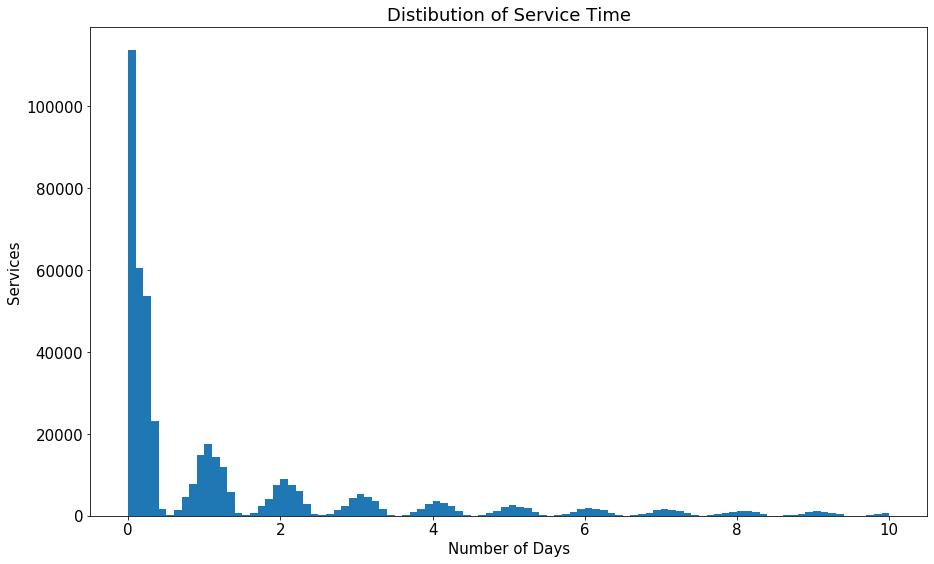

In [67]:
plt.figure(figsize=(15,9))
plt.title('Distibution of Service Time')
plt.hist(invoice_plant['Service Time'].astype('timedelta64[s]')/86400, bins=100, range=[0,10])
plt.xlabel('Number of Days')
plt.ylabel('Services')
plt.show()

Text(0.5, 0, 'Service Time in days')

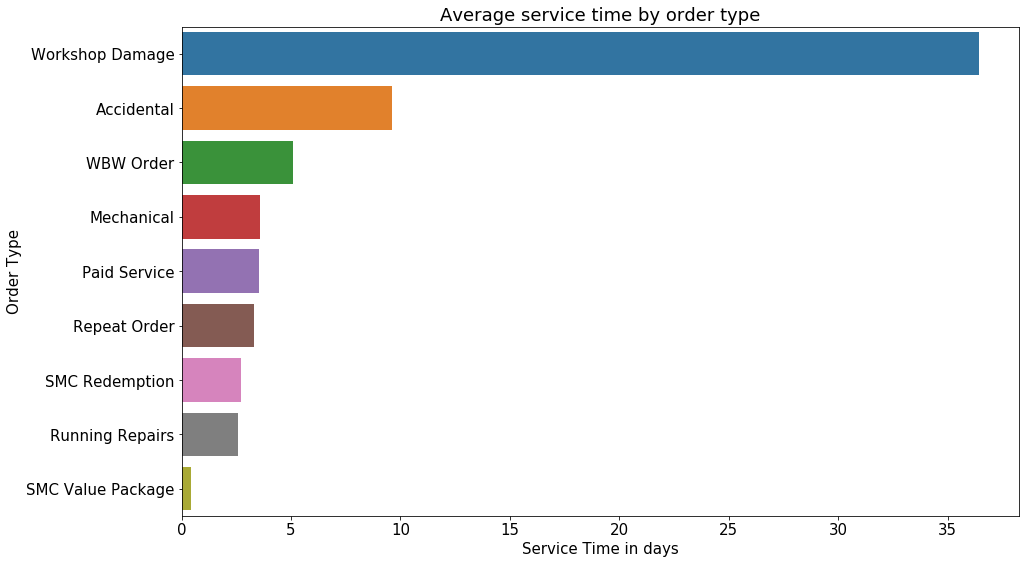

In [54]:
invoice_plant['Service Time'] = invoice_plant['Service Time'].astype('timedelta64[s]')

st_by_order_type = invoice_plant[['Order Type', 'Service Time']].groupby('Order Type').mean().reset_index()

st_by_order_type.sort_values(by='Service Time', inplace=True, ascending=False)

st_by_order_type['Service Time'] = st_by_order_type['Service Time']/86400

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Average service time by order type')
ax = sns.barplot(x='Service Time', y='Order Type', data=st_by_order_type)
ax.set_xlabel('Service Time in days')

Text(0.5, 0, 'Service Time in days')

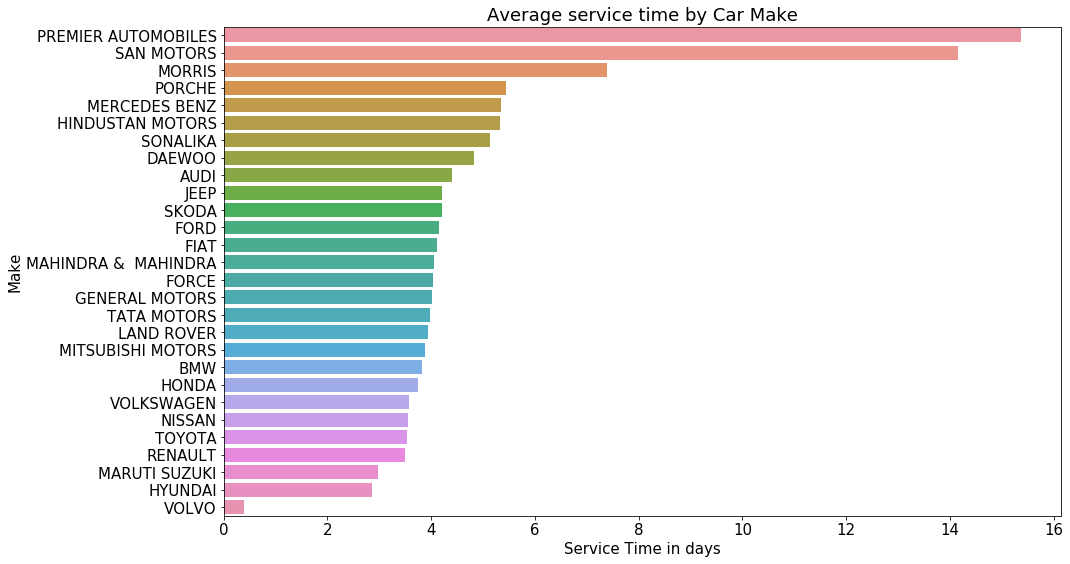

In [57]:
invoice_plant['Service Time'] = invoice_plant['Service Time'].astype('timedelta64[s]')

st_by_order_type = invoice_plant[['Make', 'Service Time']].groupby('Make').mean().reset_index()

st_by_order_type.sort_values(by='Service Time', inplace=True, ascending=False)

st_by_order_type['Service Time'] = st_by_order_type['Service Time']/86400

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Average service time by Car Make')
ax = sns.barplot(x='Service Time', y='Make', data=st_by_order_type)
ax.set_xlabel('Service Time in days')

Text(0, 0.5, 'Plant Name')

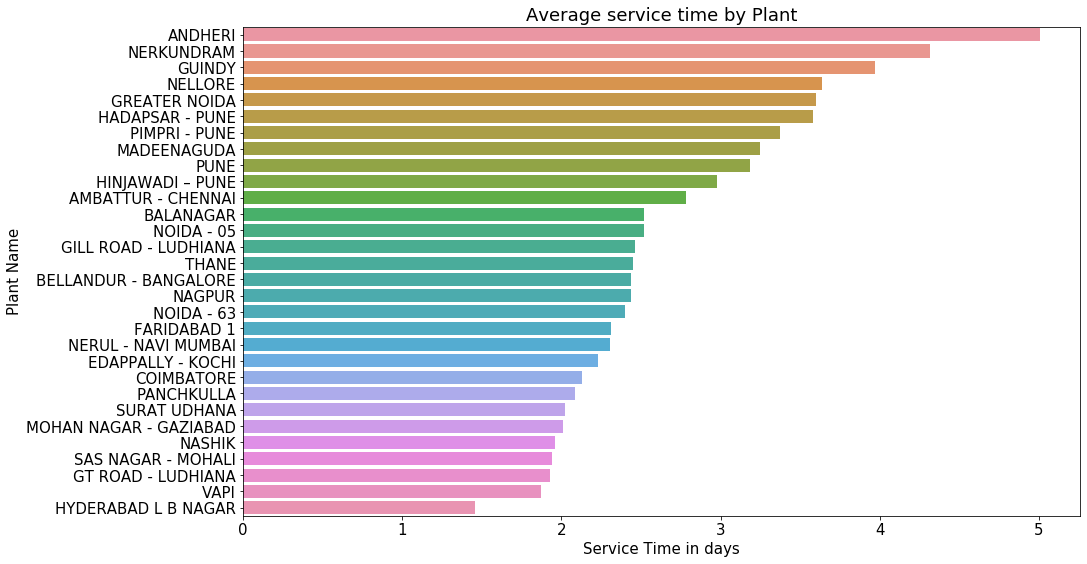

In [85]:
# invoice_plant['Service Time'] = invoice_plant['Service Time'].astype('timedelta64[s]')

st_by_order_type = invoice_plant[['Plant Name1', 'Service Time']].groupby('Plant Name1').mean().reset_index()[:30]

st_by_order_type.sort_values(by='Service Time', inplace=True, ascending=False)

st_by_order_type['Service Time'] = st_by_order_type['Service Time']/86400

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Average service time by Plant')
ax = sns.barplot(x='Service Time', y='Plant Name1', data=st_by_order_type)
ax.set_xlabel('Service Time in days')
ax.set_ylabel('Plant Name')

In [88]:
invoice_plant.columns

Index(['Unnamed: 0', 'Area / Locality', 'CITY', 'Cash /Cashless Type',
       'Claim No.', 'Cust Type', 'Customer No.', 'District', 'Expiry Date',
       'Gate Pass Date', 'Gate Pass Time', 'Insurance Company', 'Invoice Date',
       'Invoice No', 'Invoice Time', 'Job Card No', 'JobCard Date',
       'JobCard Time', 'KMs Reading', 'Labour Total', 'Make', 'Misc Total',
       'Model', 'ODN No.', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Policy no.', 'Print Status',
       'Recovrbl Exp', 'Regn No', 'Service Advisor Name', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total Value', 'User ID', 'Invoice Day',
       'Invoice Month', 'Invoice Year', 'Day of the week', 'Name 1',
       'Valuation Area', 'Customer no. - plant', 'Vendor number plant',
       'Factory calendar', 'Name 2', 'House number and street', 'PO Box',
       'Postal Code', 'City', 'Sales organization', 'State',
       'Invoice DateTime', 'Jobcard DateTime', 'Service Time'],


In [94]:
revenue_by_brand = invoice_plant[['Total Amt Wtd Tax.','Make']].groupby('Make').sum().reset_index()
revenue_by_brand['Total Amt Wtd Tax.'] = revenue_by_brand['Total Amt Wtd Tax.']/(revenue_by_brand['Total Amt Wtd Tax.'].sum())*100
revenue_by_brand.sort_values(by='Total Amt Wtd Tax.', ascending=False)

,Make,Total Amt Wtd Tax.
12,MAHINDRA & MAHINDRA,26.457281
13,MARUTI SUZUKI,21.842687
9,HYUNDAI,14.526121
24,TATA MOTORS,11.615008
6,GENERAL MOTORS,6.031404
25,TOYOTA,5.084728
5,FORD,4.498922
8,HONDA,3.175293
22,SKODA,1.821008
3,FIAT,1.417896


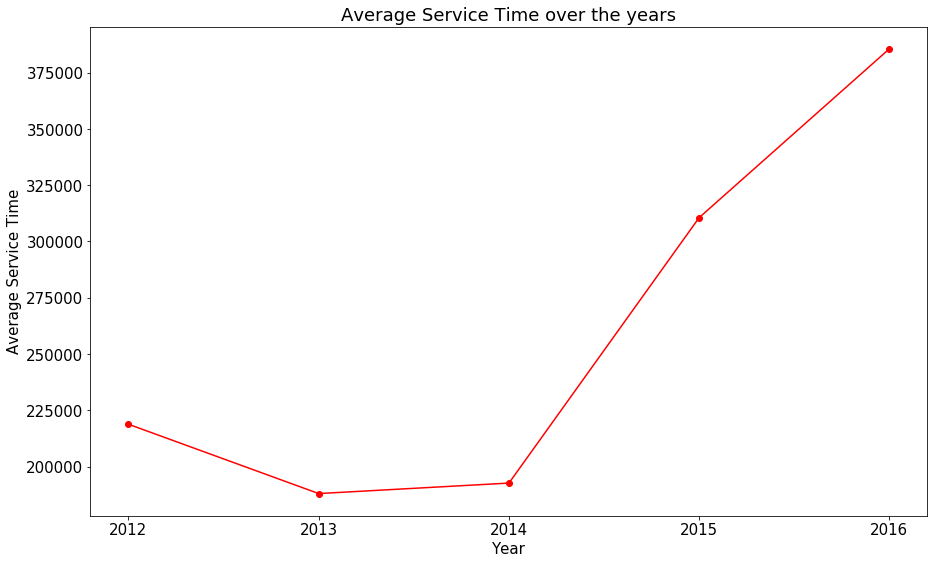

In [99]:
st_by_year = invoice_plant[['Service Time','Invoice Year']].groupby('Invoice Year').mean().reset_index()

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
line1 = plt.plot(st_by_year['Invoice Year'], st_by_year['Service Time'], marker='o', color='r', label='Services')
plt.title('Average Service Time over the years')
plt.xlabel("Year")
plt.ylabel("Average Service Time")
labels = ['2012', '2013', '2014', '2015', '2016']
plt.xticks(st_by_year['Invoice Year'], labels)
plt.show()

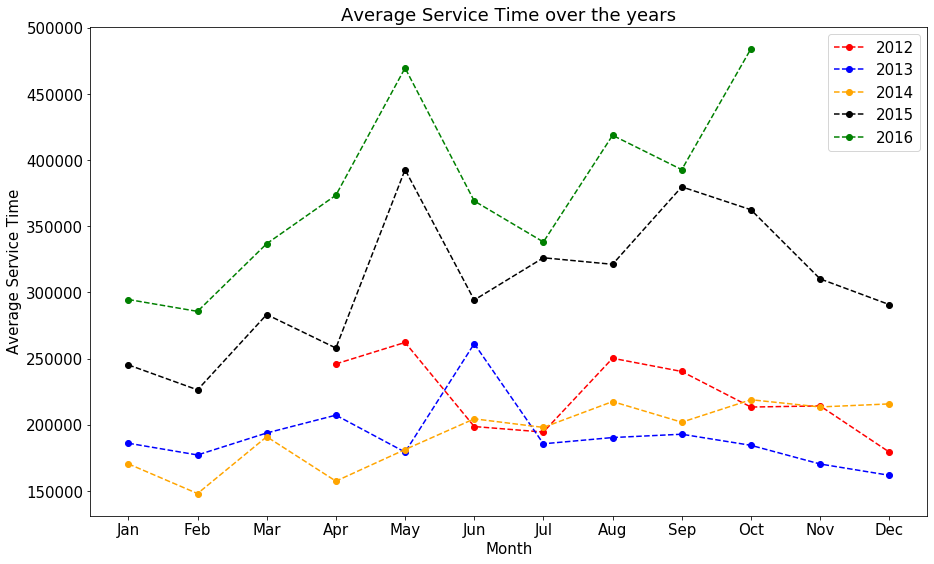

In [116]:
st_by_quarter_2012 = invoice_plant[invoice_plant['Invoice Year'] == 2012][['Invoice Month','Service Time']].groupby('Invoice Month').mean().reset_index()
st_by_quarter_2013 = invoice_plant[invoice_plant['Invoice Year'] == 2013][['Invoice Month','Service Time']].groupby('Invoice Month').mean().reset_index()
st_by_quarter_2014 = invoice_plant[invoice_plant['Invoice Year'] == 2014][['Invoice Month','Service Time']].groupby('Invoice Month').mean().reset_index()
st_by_quarter_2015 = invoice_plant[invoice_plant['Invoice Year'] == 2015][['Invoice Month','Service Time']].groupby('Invoice Month').mean().reset_index()
st_by_quarter_2016 = invoice_plant[invoice_plant['Invoice Year'] == 2016][['Invoice Month','Service Time']].groupby('Invoice Month').mean().reset_index()

plt.figure(figsize=(15,9))
plt.ticklabel_format(style='plain', axis='x')
line1 = plt.plot(st_by_quarter_2012['Invoice Month'], st_by_quarter_2012['Service Time'], marker='o', linestyle='--',color='red', label='Services')
line2 = plt.plot(st_by_quarter_2013['Invoice Month'], st_by_quarter_2013['Service Time'], marker='o', linestyle='--',color='blue', label='Services')
line3 = plt.plot(st_by_quarter_2014['Invoice Month'], st_by_quarter_2014['Service Time'], marker='o', linestyle='--',color='orange', label='Services')
line4 = plt.plot(st_by_quarter_2015['Invoice Month'], st_by_quarter_2015['Service Time'], marker='o', linestyle='--',color='black', label='Services')
line5 = plt.plot(st_by_quarter_2016['Invoice Month'], st_by_quarter_2016['Service Time'], marker='o', linestyle='--',color='green', label='Services')

plt.title('Average Service Time over the years')
plt.xlabel("Month")
plt.ylabel("Average Service Time")
plt.legend(['2012','2013','2014','2015','2016'])
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(st_by_quarter_2013['Invoice Month'], labels)
plt.show()